# Task 1 (Iris Classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
group_by_species = df.groupby('Species').mean()

In [8]:
group_by_species

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [9]:
df.drop('Id',axis=1,inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis (EDA)

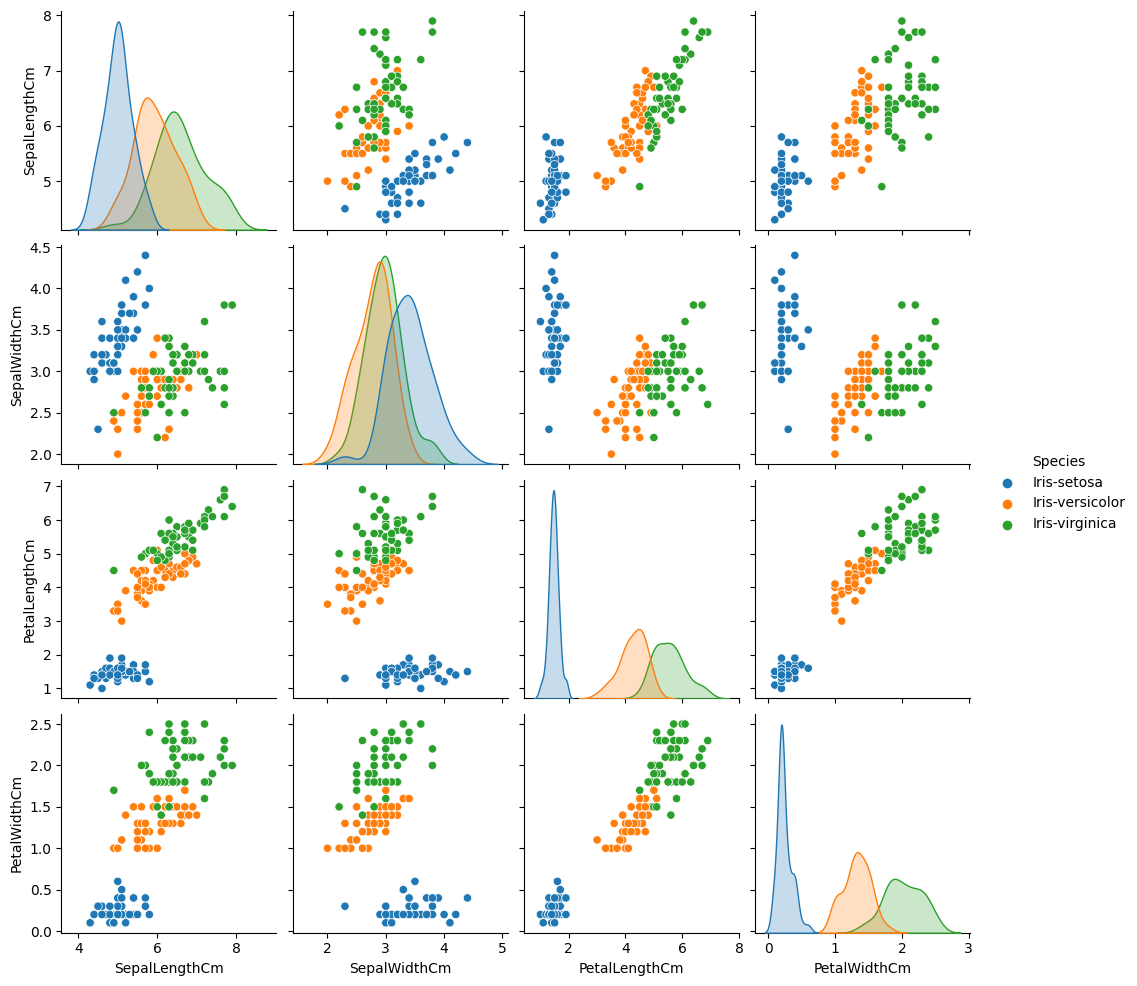

In [11]:
sns.pairplot(df,hue='Species')

<Axes: xlabel='Species', ylabel='count'>

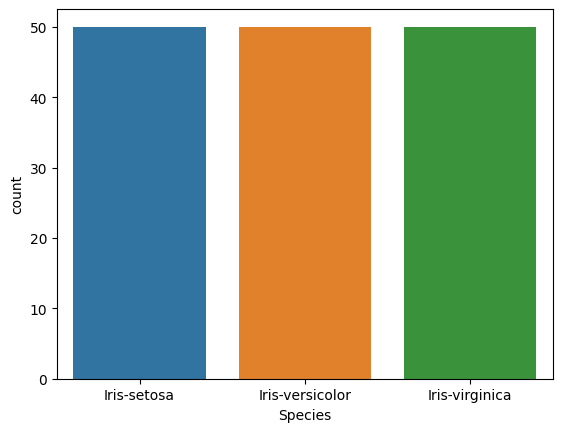

In [12]:
sns.countplot(x='Species',data=df)

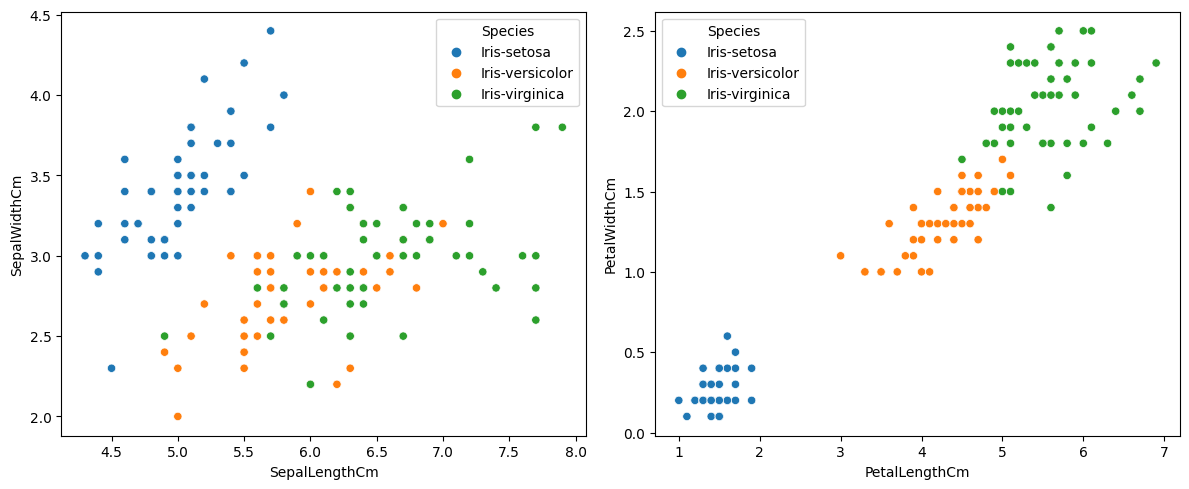

In [13]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species')

plt.subplot(1,2,2)
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species')

plt.tight_layout()

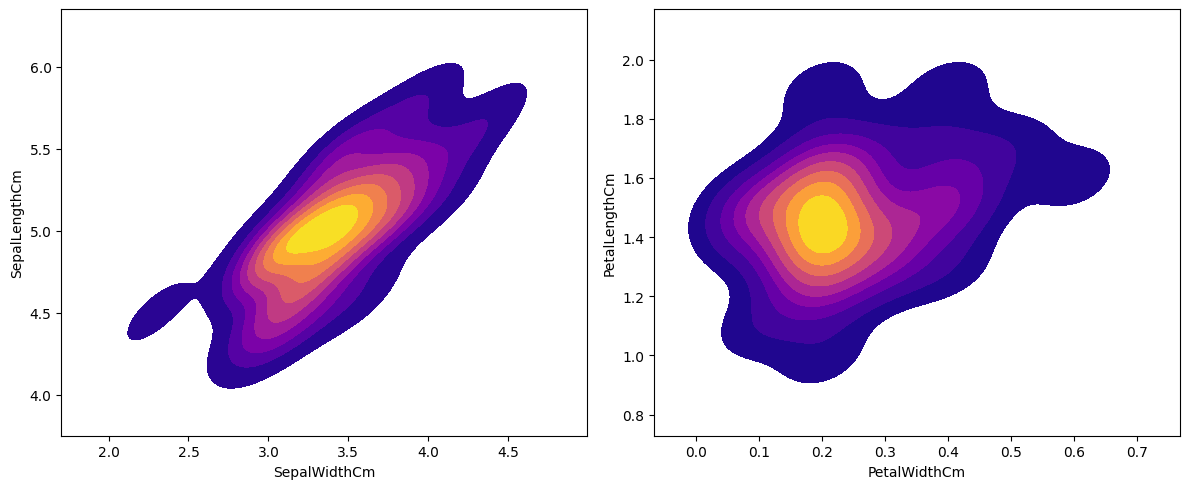

In [14]:
setosa = df[df['Species']=='Iris-setosa']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(x=setosa['SepalWidthCm'],y=setosa['SepalLengthCm'],cmap='plasma',shade=True)

plt.subplot(1,2,2)
sns.kdeplot(x=setosa['PetalWidthCm'],y=setosa['PetalLengthCm'],cmap='plasma',shade=True)

plt.tight_layout()

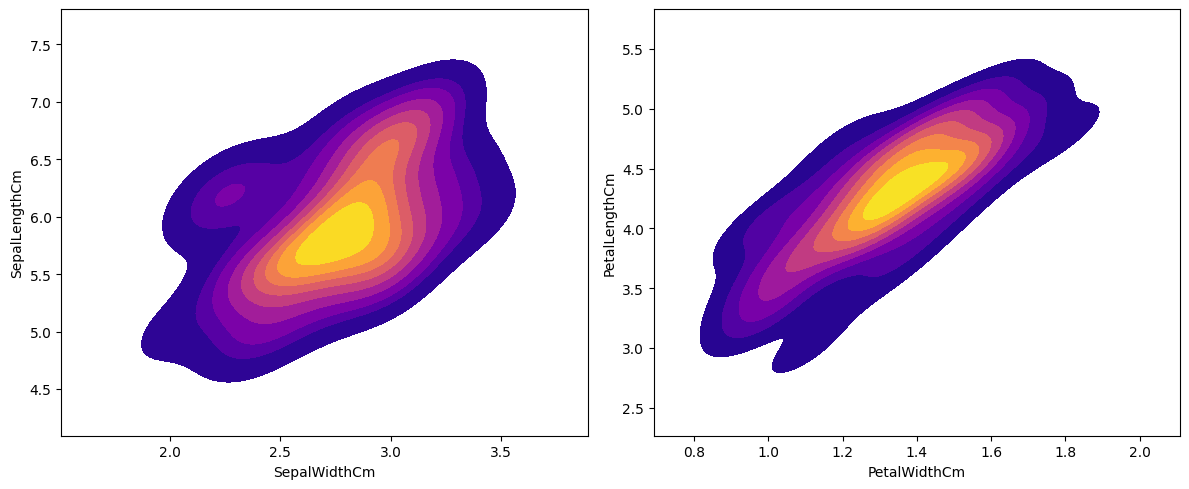

In [15]:
versicolor = df[df['Species']=='Iris-versicolor']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(x=versicolor['SepalWidthCm'],y=versicolor['SepalLengthCm'],cmap='plasma',shade=True)

plt.subplot(1,2,2)
sns.kdeplot(x=versicolor['PetalWidthCm'],y=versicolor['PetalLengthCm'],cmap='plasma',shade=True)

plt.tight_layout()

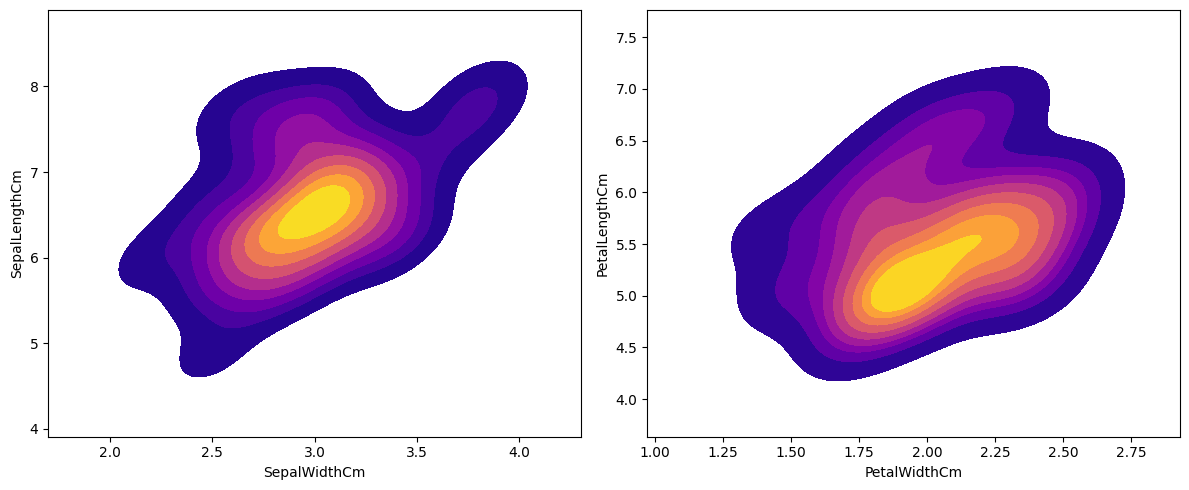

In [16]:
virginica = df[df['Species']=='Iris-virginica']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(x=virginica['SepalWidthCm'],y=virginica['SepalLengthCm'],cmap='plasma',shade=True)

plt.subplot(1,2,2)
sns.kdeplot(x=virginica['PetalWidthCm'],y=virginica['PetalLengthCm'],cmap='plasma',shade=True)

plt.tight_layout()

<Axes: >

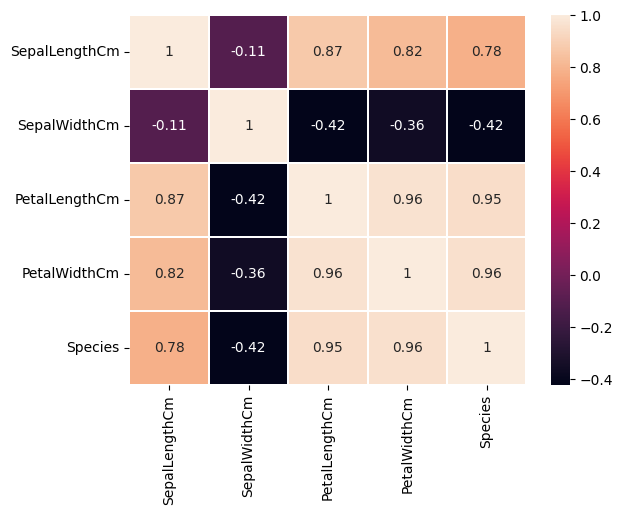

In [20]:
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=0.2)

# Machine Learning Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression

In [18]:
label_encoder = LabelEncoder()

df['Species'] = label_encoder.fit_transform(df['Species'])

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
X = df.drop('Species',axis=1)
y = df['Species']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### Logistic Regression

In [24]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

In [25]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

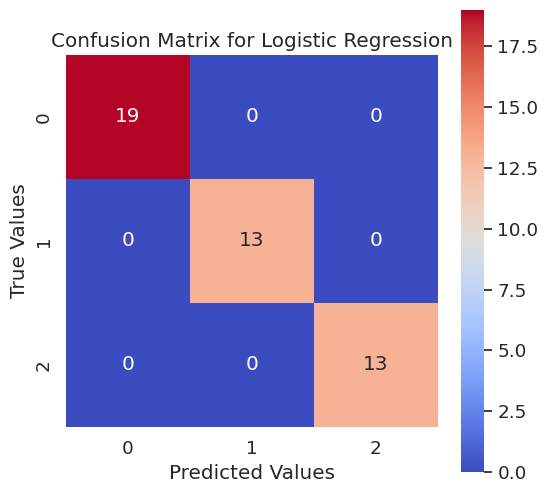

In [26]:
cm = confusion_matrix(y_test,lr_pred)
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0','1','2'],yticklabels=['0', '1','2'])

plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix for Logistic Regression')

In [27]:
print(f'Accuracy Score: {accuracy_score(y_test,lr_pred)*100:.2f}%')

Accuracy Score: 100.00%


In [28]:
lr.predict([[4.7,3.2,1.3,0.2]])

array([0])